## Data Cleaning

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [6]:
train = pd.read_csv('data/train.csv', index_col = 0)
test = pd.read_csv('data/test.csv', index_col = 0)

In [7]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0000,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0000,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0000,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0000,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0000,satisfied


In [8]:
def data_prep(df):
    df["satisfaction"] = df["satisfaction"].map({'neutral or dissatisfied': 0, 'satisfied':1})
    df = df.dropna()
    df = df.drop(columns=["id"])
    print(df.shape)
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace('/', '_')
    df.columns = df.columns.str.replace('-', '_')
    df['Type_of_Travel'] = df['Type_of_Travel'].astype('string')
    df['Class'] = df['Class'].astype('string')
    df['Gender'] = df['Gender'].astype('string')
    df['Customer_Type'] = df['Customer_Type'].astype('string')
    return df

train = data_prep(train)
test = data_prep(test)

(103594, 23)
(25893, 23)


In [9]:
X = train.drop(columns=["satisfaction"])
y = train["satisfaction"]
Xtest = test.drop(columns=["satisfaction"])
ytest = test["satisfaction"]
train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0000,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0000,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0000,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0000,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0000,1


## Data Visualizations

### Distribution of the response variable (satisfaction)

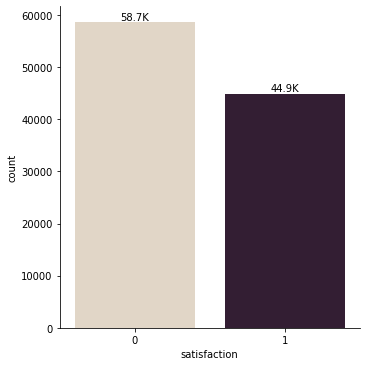

In [10]:
g = sns.catplot(x = 'satisfaction', kind = 'count', palette="ch:.25", data = train)
ax = g.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

The data does not appear to be perfectly balanced; there is a slightly greater amount of negative (dissatisfied) values.

### Distribution of each predictor (22)

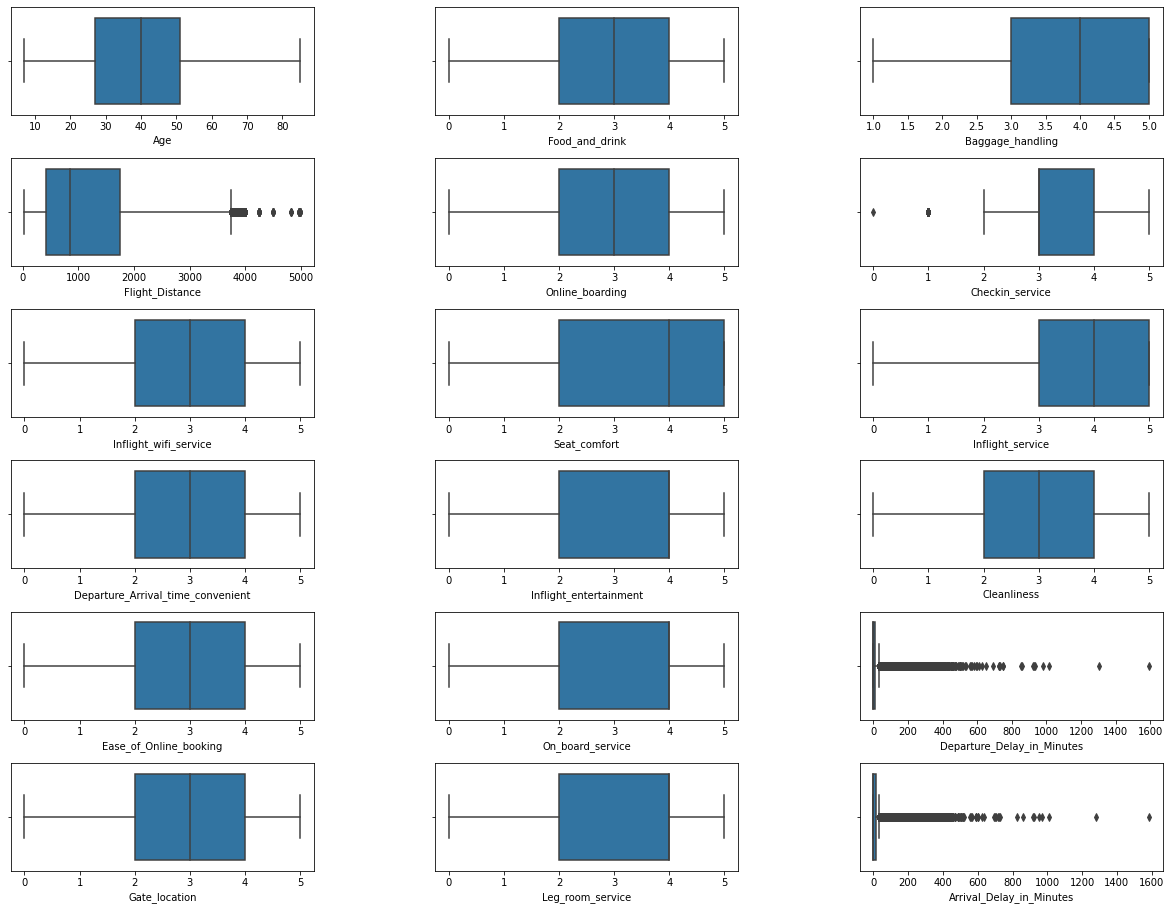

In [11]:
numeric_columns = list(X.select_dtypes(exclude = 'string').columns)

fig = plt.figure(figsize=[20,15])
axes = fig.subplots(6, 3, sharex=False, sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

j = 0
for i, column in enumerate(numeric_columns):
    i = i % 6
    sns.boxplot(x=column, data=X, ax=axes[i, j // 6])
    j += 1

Most of the predictors are ratings on a scale from 0 to 5. All of their variances appear useful. For the continuous predictors, it appears that departure delay and arrival delay in minutes have the most outliers. This is because there may be rare cases where an unusual amount of traffic occurs or a natural disaster resulting in significant delays. We do not have any reason to believe that these may be errors, but some large values may have to be removed when using boosting methods since it is sensitive to outliers.

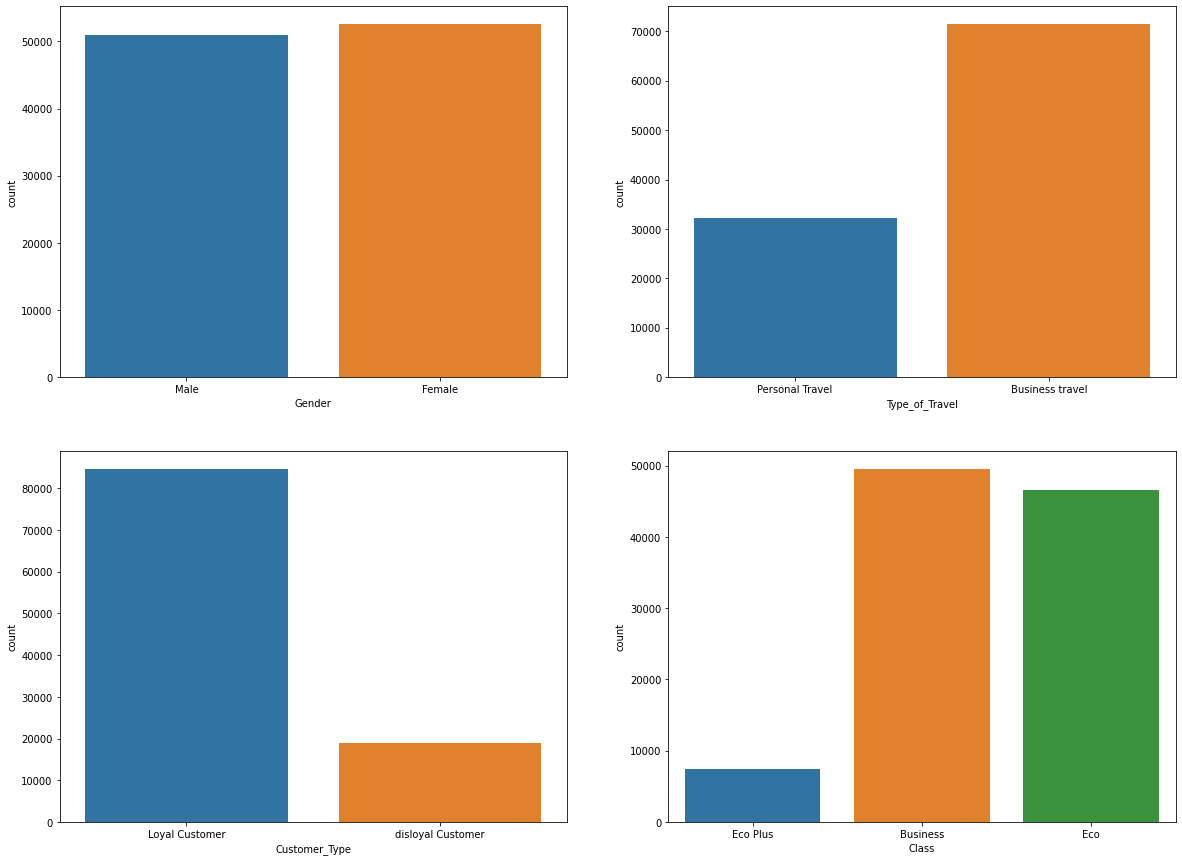

In [12]:
nonnumeric_columns = list(X.select_dtypes(include = 'string').columns)

fig = plt.figure(figsize=[20,15])
axes = fig.subplots(2, 2, sharex=False, sharey=False)

j = 0
for i, column in enumerate(nonnumeric_columns):
    sns.countplot(x = column, data = X, ax = axes[i%2, j//2])
    j+=1

For each of the four categorical predictors, it does not appear that there are too many levels (max 3). The customer type variable shows the greatest skew, but there are no levels to merge as there are only 2 levels.

### Boxplot of each predictor vs response variable

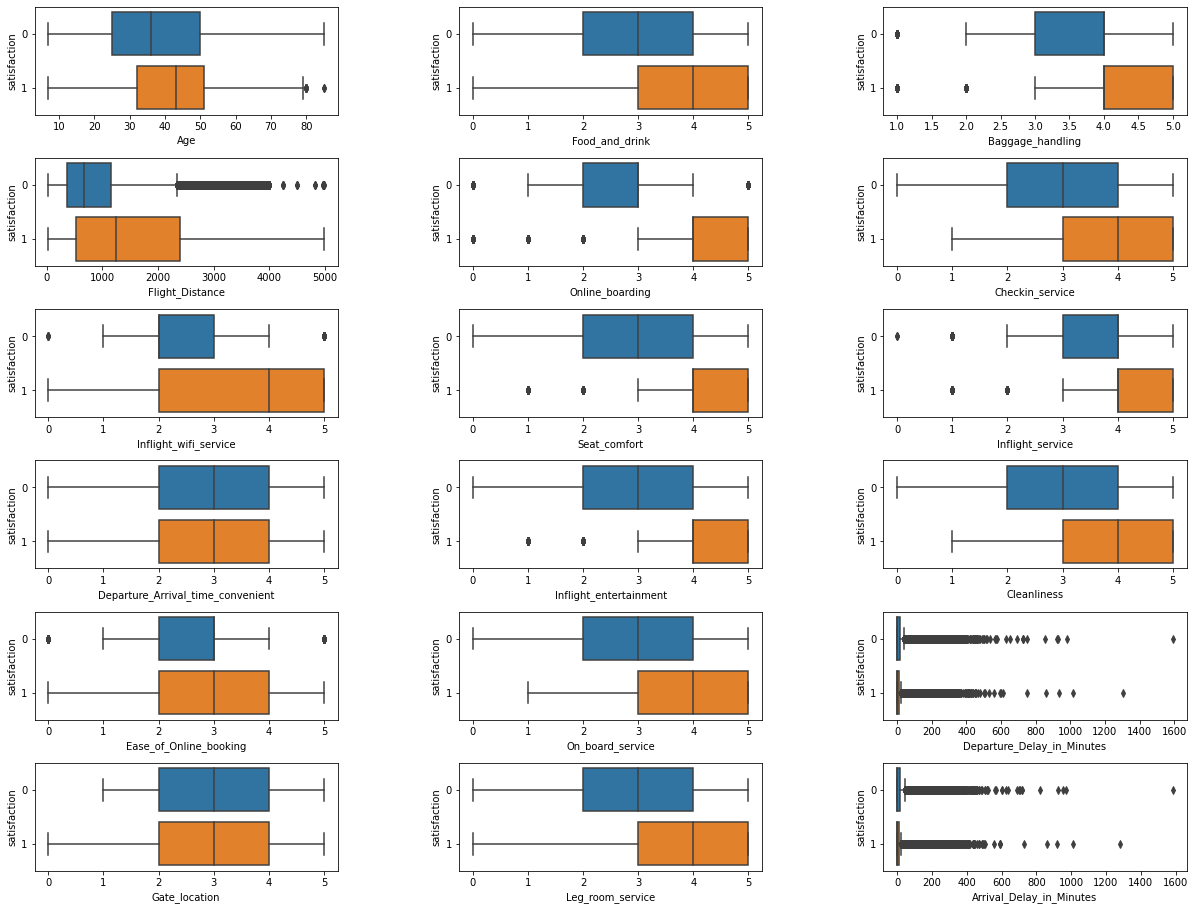

In [13]:
numeric_columns = list(X.select_dtypes(exclude = 'string').columns)
train['satisfaction'] = train['satisfaction'].astype('string')

fig = plt.figure(figsize=[20,15])
axes = fig.subplots(6, 3, sharex=False, sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

j = 0
for i, column in enumerate(numeric_columns):
    i = i % 6
    sns.boxplot(x=column, y='satisfaction', data=train, ax=axes[i, j // 6])
    j += 1

The following variables appear to be insignificant based on having similar summary statistics by level of the response variable: age, departure arrival time (convenient), departure delay, gate location, and arrival delay. The rest appear to be shifted in an intuitive way: a higher rating in a predictor (e.g. cleanliness) leads to a higher chance of a positive response.

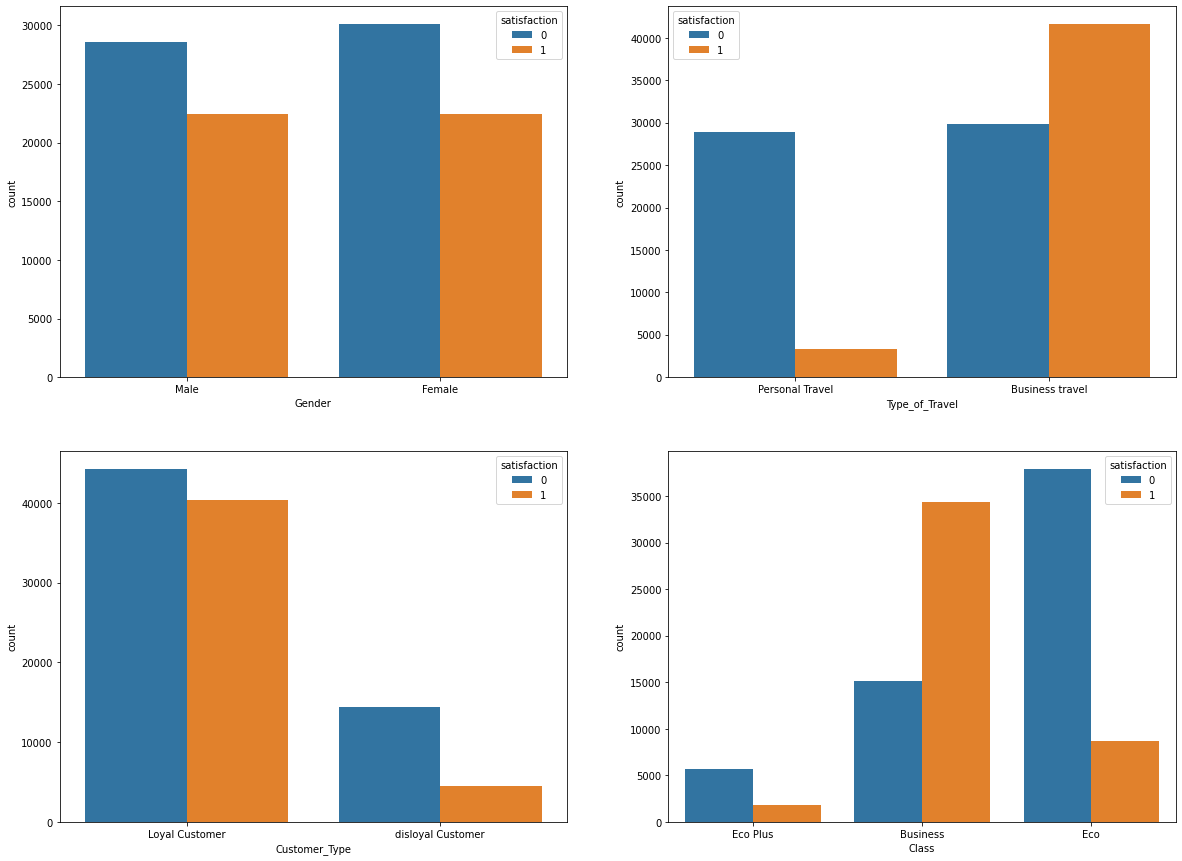

In [14]:
nonnumeric_columns = list(X.select_dtypes(include = 'string').columns)
train['satisfaction'] = train['satisfaction'].astype('string')

fig = plt.figure(figsize=[20,15])
axes = fig.subplots(2, 2, sharex=False, sharey=False)

j = 0
for i, column in enumerate(nonnumeric_columns):
    sns.countplot(x = column, hue='satisfaction', data = train, ax = axes[i%2, j//2])
    j+=1

It appears that gender is not that useful in predicting satisfaction; male and female have similar proportions of satisfied/dissatisfied customers. However, the type of travel, customer type, and class do seem to have varying responses by level. For example, someone traveling for personal travel is much more likely to be dissatisfied than a businessman.

### Concluding thoughts

We expect a tree model to perform very well on these data. There are clear ranges and categories where satisfaction performs best.